In [1]:
%matplotlib inline



# Example 1: Post-synaptic response of a single synapse #
This is an example of **``LFPy``** running in an **``Jupyter notebook``**. To run through this example code and produce output, press **``<shift-Enter>``** in each code block below.

First step is to `import LFPy` and other packages for analysis and plotting:

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import LFPy

Then, create the cell object using the `LFPy.Cell` 
class, specifying the morphology file.
The passive mechanisms
are not switched on by default.

In [3]:
cell = LFPy.Cell(morphology='morphologies/L5_Mainen96_LFPy.hoc', passive=True)

Then, align apical dendrite with z-axis:

In [4]:
cell.set_rotation(x=4.98919, y=-4.33261, z=0.)

One can now use `LFPy.Synapse` class to insert a single 
synapse onto the soma compartment, and set the spike time(s) using `LFPy.Synapse.set_spike_times()` method:

In [5]:
synapse = LFPy.Synapse(cell, 
                       idx=cell.get_idx("soma[0]"),
                       syntype='Exp2Syn', 
                       weight=0.005, 
                       e=0, 
                       tau1=0.5,
                       tau2=2,
                       record_current=True)
synapse.set_spike_times(np.array([20., 40]))

We now have what we need in order to calculate the postsynaptic response,
using a built in method `LFPy.Cell.simulate()` to run the simulation.

In [6]:
cell.simulate()

Then 
plot the model geometry, synaptic current and somatic potential:

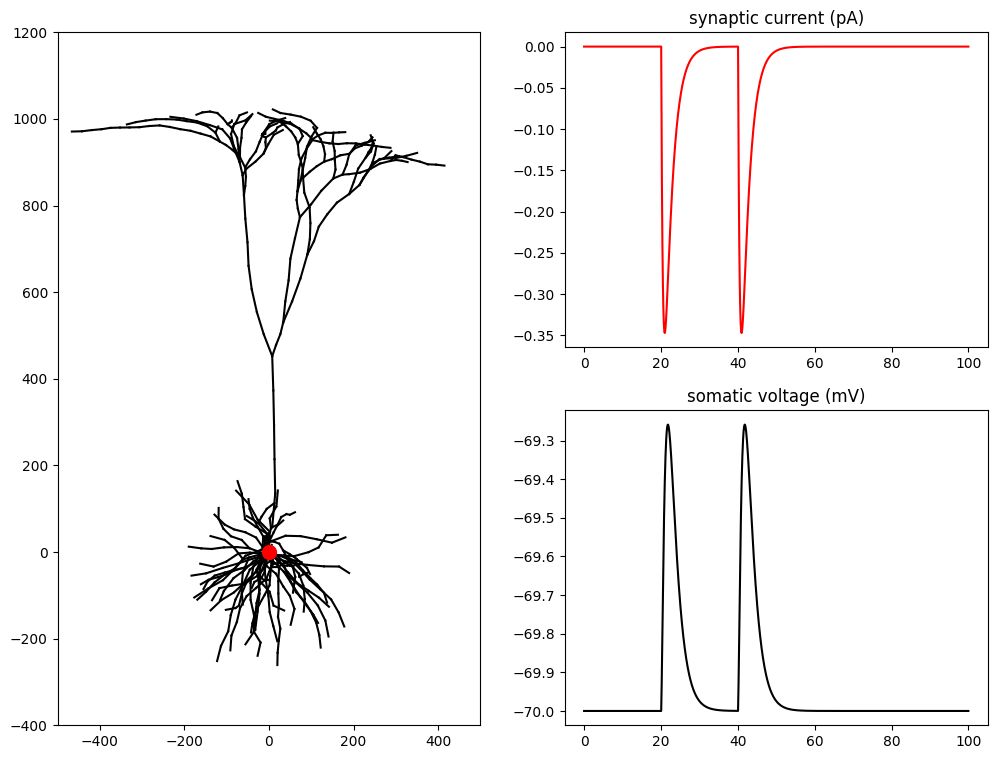

In [7]:
plt.figure(figsize=(12, 9))
plt.subplot(222)
plt.plot(cell.tvec, synapse.i, 'r')
plt.title('synaptic current (pA)')
plt.subplot(224)
plt.plot(cell.tvec, cell.somav, 'k')
plt.title('somatic voltage (mV)')
plt.subplot(121)
plt.plot(cell.x.T, cell.z.T, 'k')
plt.plot(synapse.x, synapse.z,
         color='r', marker='o', markersize=10)
plt.axis([-500, 500, -400, 1200]); # ; to suppresses output: [-500, 500, -400, 1200]

# savefig('LFPy-example-01.pdf', dpi=200)